In [1]:
import datetime
import importlib

import pdb 
from alive_progress import alive_bar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyadcirc.data.noaa as noaa

In [2]:
importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

# NOAA Library Basics

## Getting list of stations

In [3]:
noaa.NOAA_STATIONS

,Region,ID,Name
0,Alabama,8732828,"Weeks Bay, Mobile Bay"
1,Alabama,8735180,"Dauphin Island, AL"
2,Alabama,8735391,"Dog River Bridge, AL"
3,Alabama,8735523,"East Fowl River Bridge, AL"
4,Alabama,8736897,"Coast Guard Sector Mobile, AL"
...,...,...,...
289,Washington,9445958,"Bremerton, WA"
290,Washington,9446484,"Tacoma, WA"
291,Washington,9447130,"Seattle, WA"
292,Washington,9449424,"Cherry Point, WA"


Filtering by region

In [4]:
ak_stations = noaa.NOAA_STATIONS[noaa.NOAA_STATIONS["Region"] == "Alaska"]
ak_stations

,Region,ID,Name
9,Alaska,9450460,"Ketchikan, AK"
10,Alaska,9451054,"Port Alexander, AK"
11,Alaska,9451600,"Sitka, AK"
12,Alaska,9452210,"Juneau, AK"
13,Alaska,9452400,"Skagway, Taiya Inlet, AK"
14,Alaska,9452634,"Elfin Cove, AK"
15,Alaska,9453220,"Yakutat, Yakutat Bay, AK"
16,Alaska,9454050,"Cordova, AK"
17,Alaska,9454240,"Valdez, AK"
18,Alaska,9455090,"Seward, AK"


## Getting station metadata

In [5]:
# pandas dataframe - index using iloc if not searching on index key
first_station = ak_stations.iloc[0]
first_station["ID"]

9450460

In [6]:
noaa.get_station_metadata(int(first_station["ID"]))

{'name': 'Ketchikan',
 'id': 9450460,
 'coords': [228.373889, 55.331944],
 'link': 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460'}

In [7]:
!noaa_data get -p metadata 9450460

/bin/bash: line 1: noaa_data: command not found


## Station URL

We can explore the station at the following link:

https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460

In [8]:
station_link = (
    f"https://tidesandcurrents.noaa.gov/stationhome.html?id={9450460}"
)
station_link

'https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460'

## Getting station data

Lets see the main function that does this:

In [9]:
nome = 9468756
noaa.get_station_metadata(nome)

{'name': 'Nome, Norton Sound',
 'id': 9468756,
 'coords': [194.560361, 64.494611],
 'link': 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9468756'}

In [10]:
trigger_thresold = 1.0
continuity_thresold = 0.9
lull_duration = 21600
shoulder_period = 43200
chute_rule = 9

In [11]:
begin_date = "2022-08-01 00:00:00"
end_date = "2022-11-01 00:00:00"
merbok = noaa.get_event_dataset(nome, trigger_threshold=1.0, begin_date=begin_date, end_date=end_date)

In [12]:
merbok

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,2022-09-16 06:30:00,0.054,0.471,0.015,0.417,2208.0
0,Positive,2022-09-16 06:36:00,0.060,0.483,0.009,0.423,2208.0
0,Positive,2022-09-16 06:42:00,0.066,0.495,0.011,0.429,2208.0
0,Positive,2022-09-16 06:48:00,0.072,0.529,0.011,0.457,2208.0
0,Positive,2022-09-16 06:54:00,0.077,0.520,0.016,0.443,2208.0
...,...,...,...,...,...,...,...
1,Negative,2022-10-27 04:06:00,-0.018,-0.607,0.004,0.589,2208.0
1,Negative,2022-10-27 04:12:00,-0.015,-0.601,0.005,0.586,2208.0
1,Negative,2022-10-27 04:18:00,-0.011,-0.603,0.004,0.592,2208.0


In [18]:
# Matplotlib plotting options                                                   
mud_plot_params = {                                                                                                 
    "mathtext.fontset": "stix",                                                                                     
    "font.family": "STIXGeneral",                                                                                   
    "axes.labelsize": 20,                                                                                           
    "axes.titlesize": 26,                                                                                           
    "legend.fontsize": 20,                                                                                          
    "xtick.labelsize": 14,                                                                                          
    "ytick.labelsize": 14,                                                                                          
    "axes.titlepad": 1,                                                                                             
    "axes.labelpad": 1,                                                                                             
    "font.size": 20,                                                                                                
    "savefig.facecolor": "white",                                                                                   
    "text.usetex": False,                                                                                           
    "text.latex.preamble": " ".join(                                                                                
        [r"\usepackage{bm}", r"\usepackage{amsfonts}", r"\usepackage{amsmath}"]                                     
    ),                                                                                                              
}                                                                                                                   
plt.rcParams.update(mud_plot_params)     

def plot_event(events,
               event_idx=0,
               continuity_factor=0.9,
               trigger_threshold=1.0,
               value='Difference'):
    """
    Plot identified storm-surge event.
    """
    event = events.loc[event_idx].copy()
    continuity_threshold = continuity_factor*trigger_threshold
    event['C'] = event['Difference'] > continuity_threshold
    shoulder_start = event[event['C'] == True]['Date Time'].min()
    shoulder_end = event[event['C'] == True]['Date Time'].max()
    shoulder_start, shoulder_end
    event.plot(x='Date Time', y=value, marker='o', markersize=1, linestyle='-', figsize=(16, 8))
    ax = plt.gca()

    center = 1.5
    shoulder_period_height = [0.0, 3.0]
    ax.plot([event['Date Time'].min(), event['Date Time'].max()], [trigger_threshold, trigger_threshold], label='$T_t = $ Trigger Threshold')
    ax.plot([event['Date Time'].min(), event['Date Time'].max()], [continuity_threshold, continuity_threshold], label='$T_c = cT_t = $ Continuity Threshold')
    ax.plot([event['Date Time'].min(), shoulder_start], [center, center], '--k', label='Shoulder Periods')
    ax.legend()
    ax.plot([shoulder_end, event['Date Time'].max()], [center, center], '--k')
    ax.plot([event['Date Time'].min(), event['Date Time'].min()], shoulder_period_height, '--k')
    ax.plot([shoulder_start, shoulder_start], shoulder_period_height, '--k')
    ax.plot([event['Date Time'].max(), event['Date Time'].max()], shoulder_period_height, '--k')
    ax.plot([shoulder_end, shoulder_end], shoulder_period_height, '--k')
    ax.set_ylabel('$\zeta$ (m)')
    
    return ax

## Wicks Algo Breakdown

1. True false flag if residual level above trigger threshold (T).
2. Create groups between each switch between over/under threshold
3. Each under-threshold group Group is joined with surrounding groups if:

    a. **Lull period (L)** - If duration of group less than "lull" duration L. Default = 6h = 21600s.
    
    b. **Continuation threshold (C)** - If values in the group do not drop below secondary "continuity" threshold C, usually specified as a ratio of the target threshold. Default = 0.9T.
    
   Else the grouping is considered to be a separator between distinct events.
   
4. For each found grouping:

    a. **Shoulder Rule (S)** - include time periods before and after event - Include data S hours before and after identified event (measured by crossing of continuity threshold). Default = 12h = 43200s
    
    b. **Chute Rule (R)** - Include water levels that are below thresholds but considered part of onset and return of surge event -> So include R steps before and after storm surge event (after dropping below continuity threshold). Default = 9

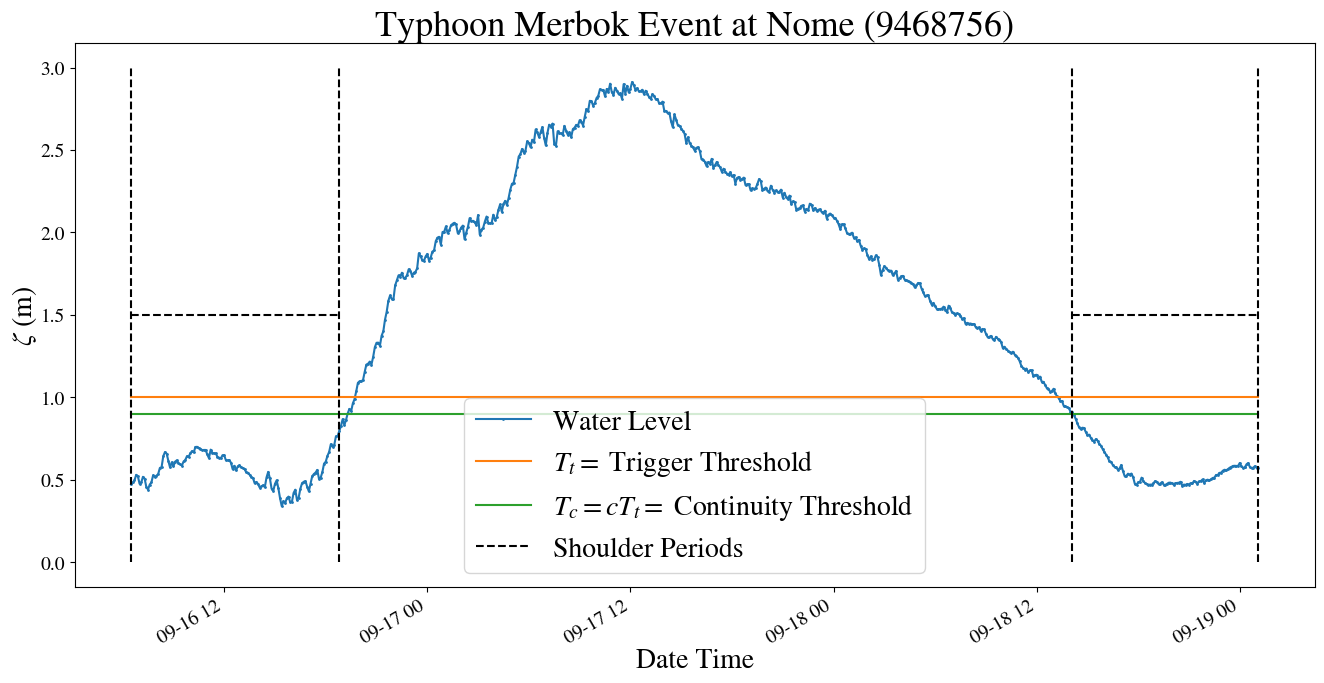

In [19]:
ax = plot_event(merbok, event_idx=0, value='Water Level')
ax.set_title(f'Typhoon Merbok Event at Nome ({nome})')

plt.savefig('merbook_event_nome.png', dpi=400)

# Main Alaska Stations

## 9468756	Nome , AK

In [55]:
importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

### Station Meta-Data

In [56]:
nome = 9468756
noaa.get_station_metadata(nome)

{'name': 'Nome, Norton Sound',
 'id': 9468756,
 'coords': [194.560361, 64.494611],
 'link': 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9468756'}

In particular we go to the link to see that the station has been in operation since July of 1992.

In [57]:
nome_begin_date = pd.to_datetime("19920101 00:00")
nome_end_date = pd.to_datetime("20230101 00:01")

### Results

In [ ]:
nome_events = noaa.get_event_dataset(nome, begin_date=nome_begin_date, end_date=nome_end_date)

In [62]:
nome_events

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,1993-01-07 01:36:00,0.175,0.678,NaN,0.503,2243.0
0,Positive,1993-01-07 01:42:00,0.175,0.687,NaN,0.512,2243.0
0,Positive,1993-01-07 01:48:00,0.174,0.693,NaN,0.519,2243.0
0,Positive,1993-01-07 01:54:00,0.173,0.705,NaN,0.532,2243.0
0,Positive,1993-01-07 02:00:00,0.172,0.723,NaN,0.551,2243.0
...,...,...,...,...,...,...,...
167,Negative,2022-12-26 20:18:00,0.183,0.001,0.002,0.182,7053.1
167,Negative,2022-12-26 20:24:00,0.182,-0.002,0.002,0.184,7053.1
167,Negative,2022-12-26 20:30:00,0.181,-0.002,0.002,0.183,7053.1


In [101]:
mask = (nome_events['Date Time'].dt.year == 2021)# (nome_events['Date Time'].dt.month == 12) & (nome_events['Date Time'].dt.year == 2011)
nome_events.loc[mask]

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
150,Negative,2021-01-10 10:42:00,-0.047,-0.419,0.001,0.372,8386.6
150,Negative,2021-01-10 10:48:00,-0.041,-0.423,0.001,0.382,8386.6
150,Negative,2021-01-10 10:54:00,-0.034,-0.420,0.002,0.386,8386.6
150,Negative,2021-01-10 11:00:00,-0.027,-0.420,0.001,0.393,8386.6
150,Negative,2021-01-10 11:06:00,-0.020,-0.418,0.001,0.398,8386.6
...,...,...,...,...,...,...,...
154,Positive,2021-12-30 00:18:00,0.175,-0.023,0.001,0.198,8735.0
154,Positive,2021-12-30 00:24:00,0.176,-0.027,0.001,0.203,8735.0
154,Positive,2021-12-30 00:30:00,0.176,-0.038,0.003,0.214,8735.0


In [32]:
nome_events.to_csv(f'data/nome_{nome}_1m.csv', index=True, header=True)

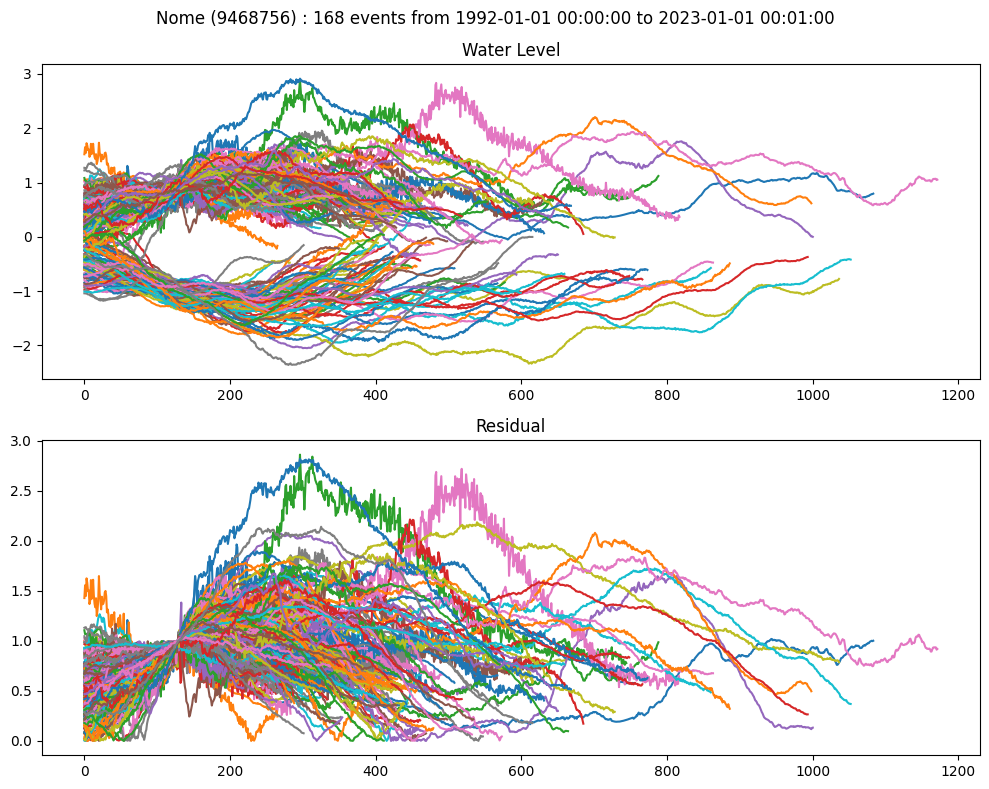

In [60]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in nome_events.groupby('Event ID'):
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)

ax1.set_title(f"Water Level")
ax2.set_title(f"Residual")

plt.suptitle(f"Nome ({nome}) : {len(np.unique(nome_events.index))} events from {nome_begin_date} to {nome_end_date}") 

fig.tight_layout()

<Axes: xlabel='Date Time', ylabel='$\\zeta$ (m)'>

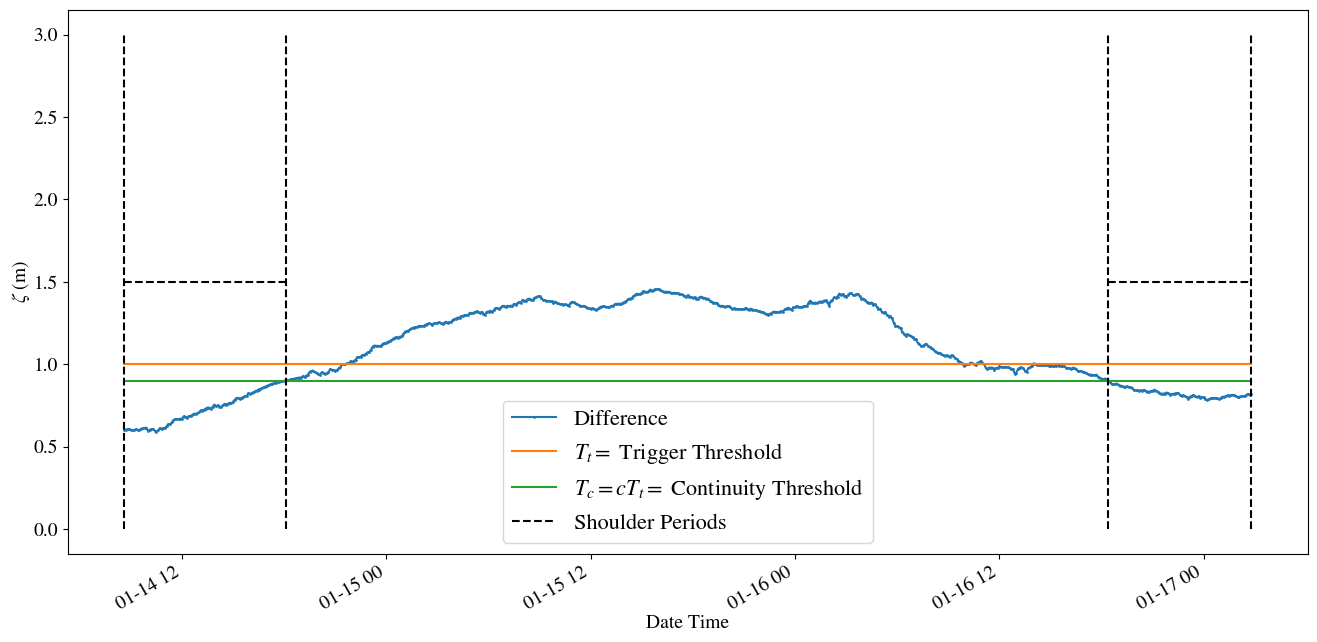

In [94]:
plot_event(nome_events, event_idx=8)

<Axes: xlabel='Date Time', ylabel='$\\zeta$ (m)'>

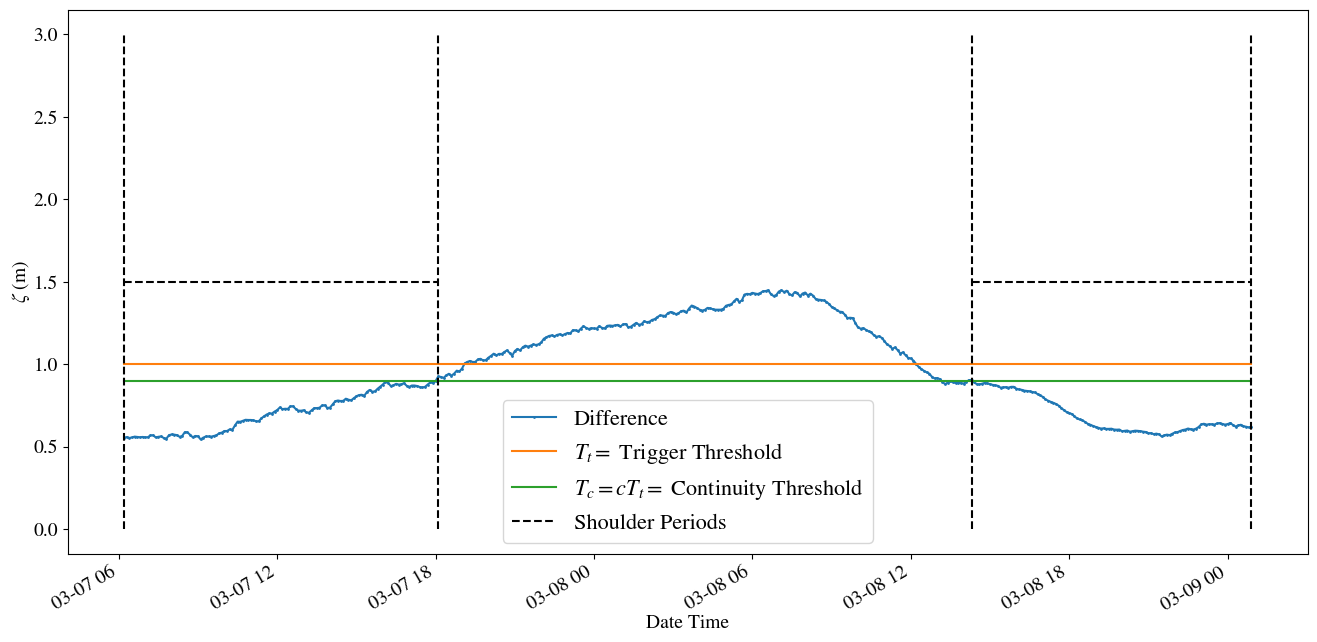

In [109]:
plot_event(nome_events, event_idx=151)

## 9491094	Red Dog Dock, AK

### Station Meta-Data

In particular we go to the link to see that the station has been in operation since August of 2003.

In [20]:
rdd = 9491094
noaa.get_station_metadata(rdd)

{'name': 'Red Dog Dock',
 'id': 9491094,
 'coords': [195.935611, 67.575806],
 'link': 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9491094'}

In [21]:
rdd_begin_date = pd.to_datetime("20030101 00:00")
rdd_end_date = pd.to_datetime("20230101 00:01")

In [23]:
rdd_events = noaa.get_event_dataset(rdd, begin_date=rdd_begin_date, end_date=rdd_end_date)

In [ ]:
rdd_events

In [33]:
rdd_events.to_csv(f'data/rdd_{rdd}_1m.csv', index=True, header=True)

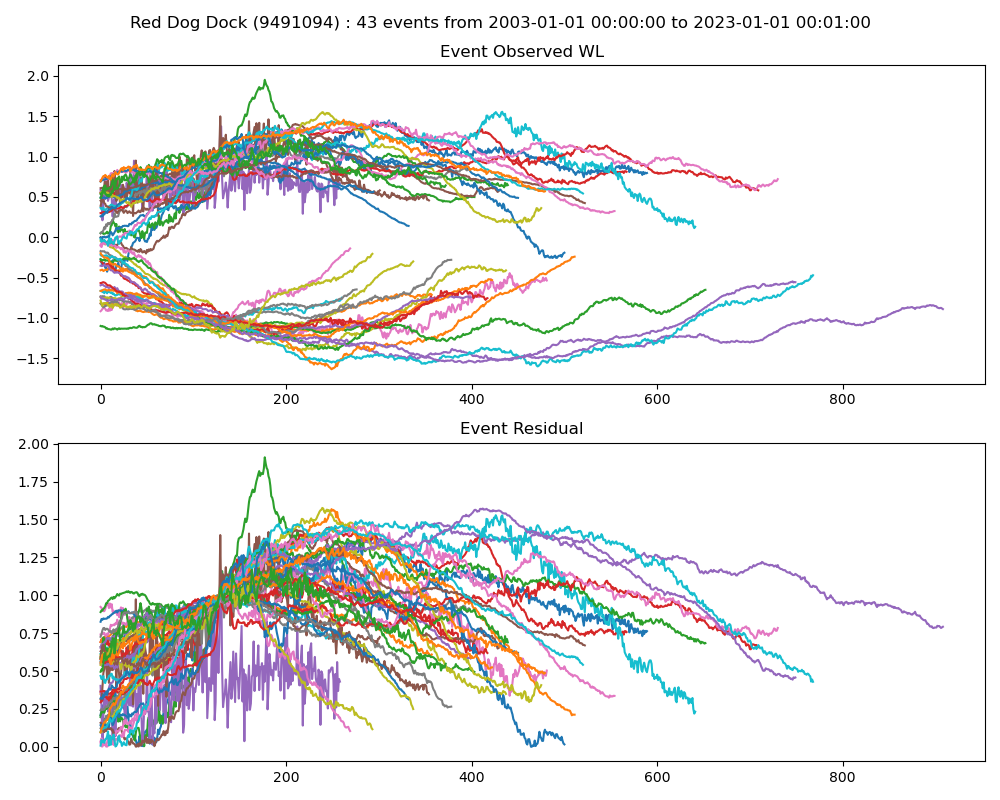

In [20]:
len(rdd_events)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in rdd_events.groupby('Event ID'):
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)

ax1.set_title(f"Event Observed WL")
ax2.set_title(f"Event Residual")

plt.suptitle(f"Red Dog Dock ({rdd}) : {len(np.unique(rdd_events.index))} events from {rdd_begin_date} to {rdd_end_date}") 

fig.tight_layout()

## Important Events


### Feb 2011 Storm

In [116]:
mask = (rdd_events['Date Time'].dt.year == 2011)# (nome_events['Date Time'].dt.month == 12) & (nome_events['Date Time'].dt.year == 2011)
rdd_events.loc[mask]

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
15,Positive,2011-02-17 03:54:00,-0.158,0.000,0.008,0.158,8735.0
15,Positive,2011-02-17 04:00:00,-0.162,-0.011,0.009,0.151,8735.0
15,Positive,2011-02-17 04:06:00,-0.164,-0.040,0.008,0.124,8735.0
15,Positive,2011-02-17 04:12:00,-0.167,-0.064,0.008,0.103,8735.0
15,Positive,2011-02-17 04:18:00,-0.170,-0.073,0.010,0.097,8735.0
...,...,...,...,...,...,...,...
17,Negative,2011-12-17 03:42:00,-0.011,-0.654,0.002,0.643,8735.0
17,Negative,2011-12-17 03:48:00,-0.008,-0.655,0.004,0.647,8735.0
17,Negative,2011-12-17 03:54:00,-0.006,-0.650,0.003,0.644,8735.0


<Axes: xlabel='Date Time', ylabel='$\\zeta$ (m)'>

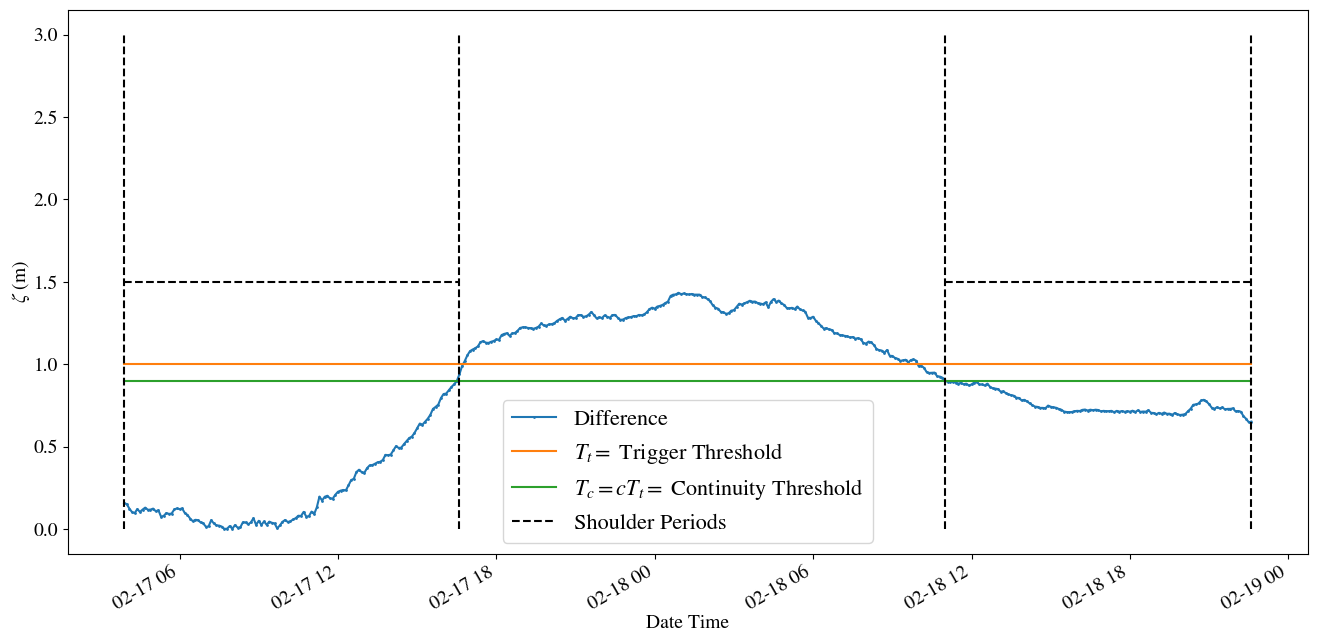

In [121]:
plot_event(rdd_events, event_idx=15)

### Jan 2017 Storm

In [122]:
mask = (rdd_events['Date Time'].dt.year == 2017)# (nome_events['Date Time'].dt.month == 12) & (nome_events['Date Time'].dt.year == 2011)
rdd_events.loc[mask]

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
24,Negative,2017-01-13 16:36:00,-0.049,-0.596,0.004,0.547,8735.0
24,Negative,2017-01-13 16:42:00,-0.052,-0.591,0.005,0.539,8735.0
24,Negative,2017-01-13 16:48:00,-0.056,-0.586,0.003,0.530,8735.0
24,Negative,2017-01-13 16:54:00,-0.060,-0.595,0.003,0.535,8735.0
24,Negative,2017-01-13 17:00:00,-0.064,-0.604,0.003,0.540,8735.0
...,...,...,...,...,...,...,...
27,Negative,2017-12-31 23:30:00,0.075,-0.867,0.004,0.942,8735.0
27,Negative,2017-12-31 23:36:00,0.074,-0.872,0.005,0.946,8735.0
27,Negative,2017-12-31 23:42:00,0.073,-0.849,0.003,0.922,8735.0


Text(0.5, 1.0, 'Red Dog Dock (9491094) December 2017 Event')

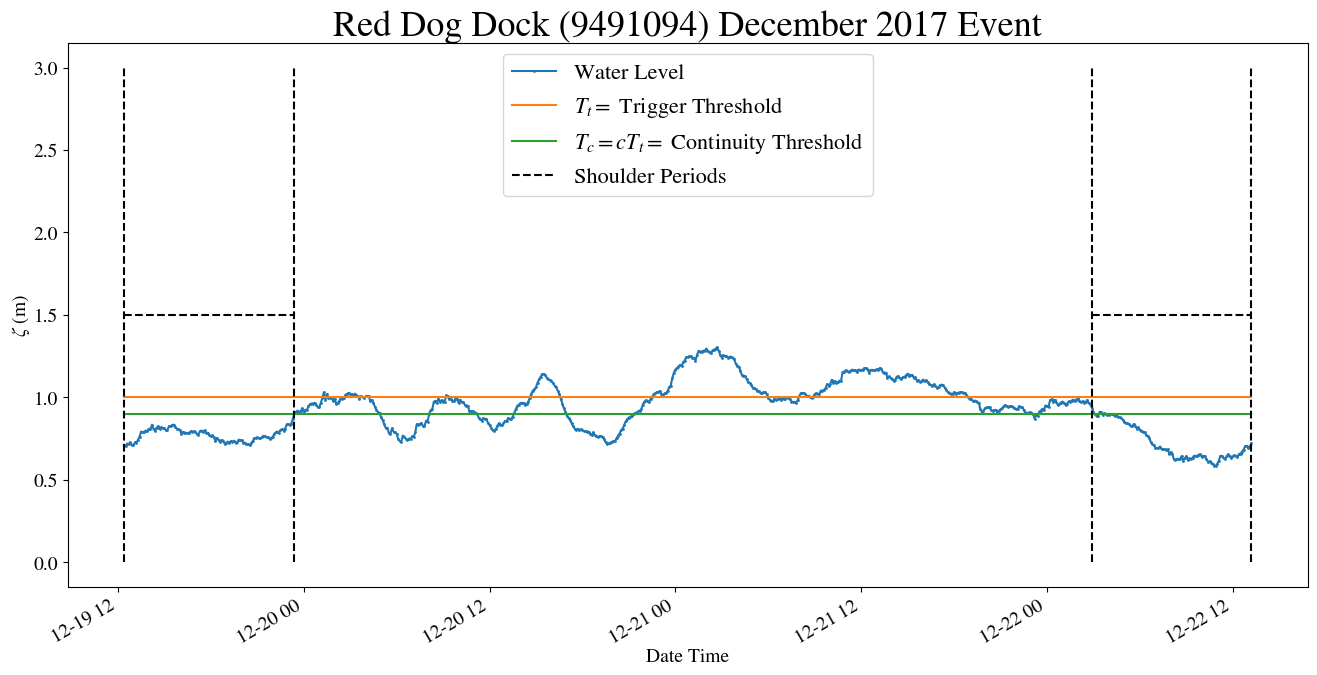

In [129]:
ax = plot_event(rdd_events, event_idx=26, value='Water Level')
ax.set_title(f'Red Dog Dock ({rdd}) December 2017 Event')

## 9468333 Unalakleet, AK

Lets see thet station metadata - In particular we go to the link to see that the station has been in operation since May 01, 2011

In [21]:
una = 9468333
noaa.get_station_metadata(una)

{'name': 'Unalakleet',
 'id': 9468333,
 'coords': [199.2157, 63.871361],
 'link': 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9468333'}

In [24]:
una_begin_date = pd.to_datetime("20110501 00:00")
una_end_date = pd.to_datetime("20230101 00:01")

In [25]:
una_events = noaa.get_event_dataset(una, begin_date=una_begin_date, end_date=una_end_date)

In [34]:
una_events.to_csv(f'data/unalakleet_{una}_1m.csv', index=True, header=True)


In [39]:
events = pd.read_csv(f'data/unalakleet_{una}_1m.csv', header=0)
events.set_index('Event ID', inplace=True)
events

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,2011-08-04 23:36:00,-0.189,-0.538,0.001,0.349,1821.1
0,Positive,2011-08-04 23:42:00,-0.178,-0.531,0.002,0.353,1821.1
0,Positive,2011-08-04 23:48:00,-0.166,-0.523,0.002,0.357,1821.1
0,Positive,2011-08-04 23:54:00,-0.154,-0.517,0.002,0.363,1821.1
0,Positive,2011-08-05 00:00:00,-0.142,-0.506,0.004,0.364,1821.1
...,...,...,...,...,...,...,...
60,Positive,2022-03-06 01:18:00,0.174,0.278,0.001,0.104,8735.0
60,Positive,2022-03-06 01:24:00,0.174,0.276,0.000,0.102,8735.0
60,Positive,2022-03-06 01:30:00,0.173,0.276,0.001,0.103,8735.0


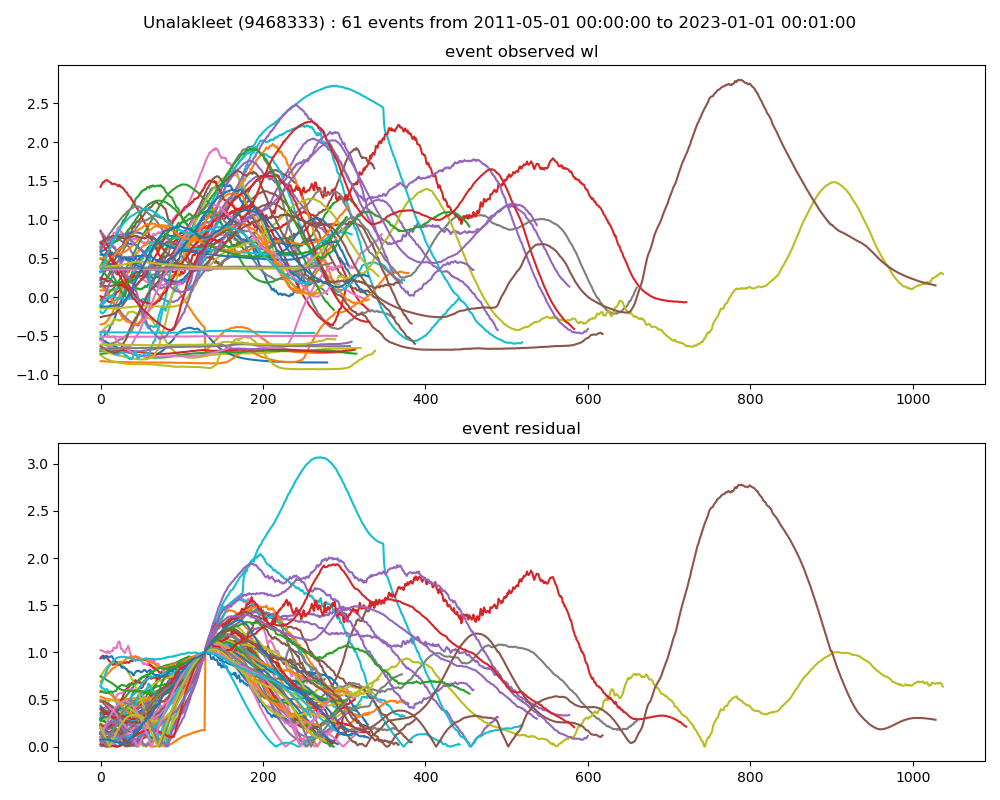

In [28]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in una_events.groupby('Event ID'):
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)
    # e["water level"].plot(ax=ax1)
    # e["difference"].plot(ax=ax2)

ax1.set_title(f"event observed wl")
ax2.set_title(f"event residual")

plt.suptitle(f"Unalakleet ({una}) : {len(np.unique(una_events.index))} events from {una_begin_date} to {una_end_date}") 

fig.tight_layout()

# Other Alaska Stations

Other more tidally dominant Alaska NOAA stations:

## 9450460	Ketchikan, AK


In [12]:
ketchikan = 9450460
noaa.get_station_metadata(ketchikan), (f"https://tidesandcurrents.noaa.gov/stationhome.html?id={ketchikan}")

({'name': 'Ketchikan', 'id': 9450460, 'coords': [228.373889, 55.331944]},
 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460')

In [13]:
begin_date = "1990-06-20 00:00:00"
end_date = "2023-01-01 00:00:00"

In [18]:
importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

In [20]:
ketchikan_raw_data, ketchikan_events = noaa.get_event_dataset(ketchikan, begin_date=begin_date, end_date=end_date)

In [24]:
ketchikan_events

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,2007-07-16 18:00:00,0.218,0.301,0.012,0.083,8735.0
0,Positive,2007-07-16 18:06:00,0.112,0.194,0.018,0.082,8735.0
0,Positive,2007-07-16 18:12:00,0.005,0.076,0.012,0.071,8735.0
0,Positive,2007-07-16 18:18:00,-0.101,-0.028,0.013,0.073,8735.0
0,Positive,2007-07-16 18:24:00,-0.206,-0.146,NaN,0.060,8735.0
...,...,...,...,...,...,...,...
1,Positive,2007-07-18 23:42:00,-1.298,-1.107,0.000,0.191,8735.0
1,Positive,2007-07-18 23:48:00,-1.237,-1.048,0.000,0.189,8735.0
1,Positive,2007-07-18 23:54:00,-1.172,-0.979,0.010,0.193,8735.0


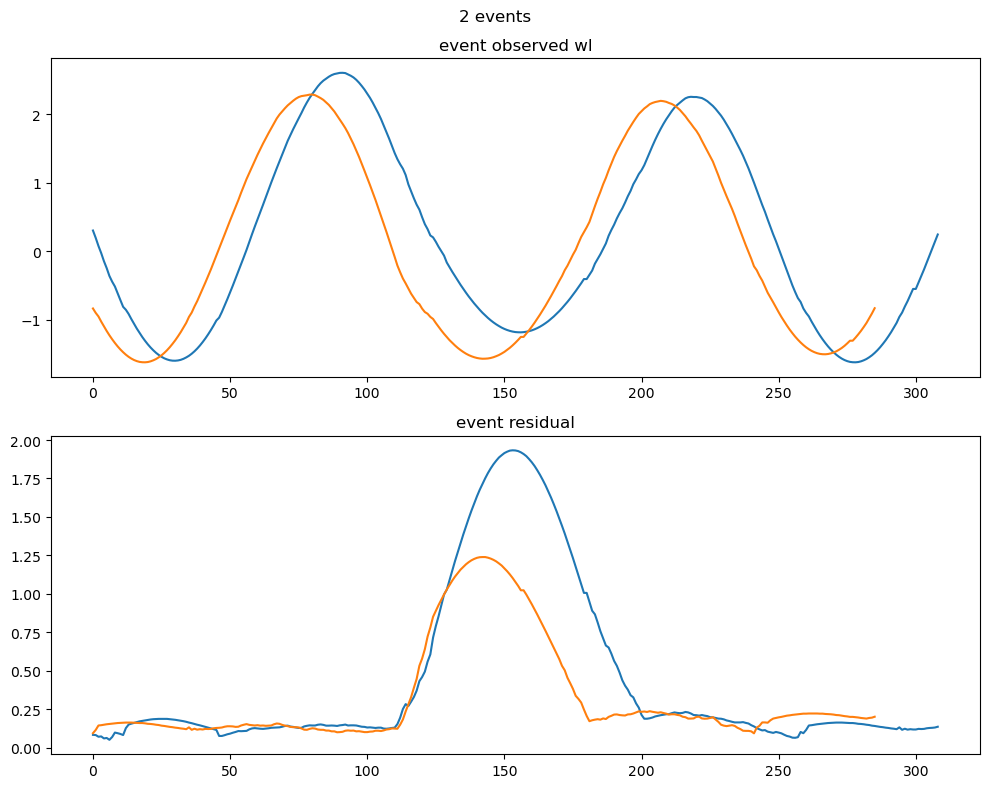

In [26]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in ketchikan_events.groupby('Event ID'):
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)
    # e["water level"].plot(ax=ax1)
    # e["difference"].plot(ax=ax2)

ax1.set_title(f"event observed wl")
ax2.set_title(f"event residual")

plt.suptitle(f"{len(np.unique(ketchikan_events.index))} events") 

fig.tight_layout()